
##  PROJECT TITLE:“Features Extraction for Classification”





# Import libraries

In [824]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from pandas import DataFrame as df
from numpy.fft import fft, ifft
%matplotlib inline

# Load data

In [825]:
x_train = pd.read_csv('total_acc_x_train.txt', sep=" ",names=list(range(128)),index_col=False ,skipinitialspace=True)
#print(x_train)
x_test = pd.read_csv('total_acc_x_test.txt',   sep=" ",names=list(range(128)),index_col=False ,skipinitialspace=True)
y_train=pd.read_csv('y_train.txt',sep=" ",names=list(range(1)),index_col=False ,skipinitialspace=True)
y_test=pd.read_csv('y_test.txt',sep=" ",names=list(range(1)),index_col=False ,skipinitialspace=True)


# Pre Processing

## min max Scaler

In [826]:

def min_max_Scaler(x_train,x_test):
    # define min max scaler
    scaler = MinMaxScaler()
    # transform data
    x_train = scaler.fit_transform(x_train)
    #x_train=df(x_train)

    print(type(x_train))
    
    
    x_test = scaler.fit_transform(x_test)
    #x_test=df(x_test)

    print(type(x_test))
    
    return(x_train,x_test)


## standard_scaler

In [827]:



def standard_scaler(x_train,x_test):
    # define min max scaler
    scaler = StandardScaler()
    # transform data
    x_train = scaler.fit_transform(x_train)
    #x_train=df(x_train)

    print(type(x_train))
    
    
    x_test = scaler.fit_transform(x_test)
    #x_test=df(x_test)

    print(type(x_test))
    
    return(x_train,x_test)


# FFT Transform

In [828]:
def fast_fourier_transform(x_train,x_test):
    ## add np.square() to get the feature
    fft_x_train=((abs(np.fft.rfft(x_train,axis=1))))
    
    fft_x_test=((abs(np.fft.rfft(x_test,axis=1))))
    
    
    return(fft_x_train,fft_x_test)

In [829]:
(x_train_fft,x_test_fft)=fast_fourier_transform(x_train,x_test)
print(x_train_fft.shape,x_test_fft)

(7352, 65) [[1.27206836e+02 1.07584324e-01 3.13156362e-01 ... 1.06487631e-02
  1.06935476e-02 1.07071000e-02]
 [1.27145362e+02 1.39922729e-01 1.51517911e-01 ... 4.82380000e-03
  4.81877090e-03 4.81710000e-03]
 [1.27094627e+02 1.07397341e-01 1.93212720e-02 ... 4.82008694e-03
  4.80346216e-03 4.79790000e-03]
 ...
 [1.25527297e+02 2.20575657e+00 2.75383663e+00 ... 5.13264731e-02
  5.04784896e-02 5.02016000e-02]
 [1.22729541e+02 1.41082908e+00 3.73536746e+00 ... 1.14326698e-01
  1.14986469e-01 1.15197200e-01]
 [1.20659040e+02 3.30651332e+00 5.78808799e+00 ... 1.44091698e-01
  1.43556887e-01 1.43381700e-01]]


## run min_max scaler on time signals

In [733]:
(x_train,x_test)=min_max_Scaler(x_train,x_test)
print(x_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7352, 128)


## run min_max scaler on frequency signals

In [810]:
(x_train_fft,x_test_fft)=min_max_Scaler(x_train_fft,x_test_fft)
print(x_train_fft.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7352, 65)


## run standard scaler on time signals

In [830]:
(x_train,x_test)=standard_scaler(x_train,x_test)
print(x_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7352, 128)


## run standard scaler on frequency signals

In [831]:
(x_train_fft,x_test_fft)=standard_scaler(x_train_fft,x_test_fft)
print(x_train_fft.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7352, 65)


In [610]:
#x_train=x_train.to_numpy()
#x_test=x_test.to_numpy()

In [758]:
from sklearn.metrics import accuracy_score

knnClass = KNeighborsClassifier(n_neighbors=3)
knnClass.fit(x_train_fft, y_train)
y_pred = knnClass.predict(x_test_fft)
accuracy_score(y_test, y_pred)

<ipython-input-758-766fc3d08008>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnClass.fit(x_train_fft, y_train)


0.7655242619613166

## Time Domain and Frequency Domain features

## Average

In [832]:
def average(x_train,x_test):
    
    print(x_train.shape,x_test.shape)
    
   

    
    
    k=np.mean(x_train,axis=1)
    l=np.mean(x_test,axis=1)
    print(k.shape,l.shape)
    kk=k.reshape(-1,1)
    ll=l.reshape(-1,1)
    print(kk.shape,ll.shape)
    return(kk,ll)


In [833]:
(x_train_av,x_test_av)=average(x_train,x_test)
(fft_x_train_av,fft_x_test_av)=average(x_train_fft,x_test_fft)
#x_train_av=x_train_av.transpose()
#x_test_av=x_test_av.transpose()
print(x_train_av.shape)
print(x_test_av.shape)
print(fft_x_train_av.shape)
print(fft_x_test_av.shape)
    

(7352, 128) (2947, 128)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 65) (2947, 65)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 1)
(2947, 1)
(7352, 1)
(2947, 1)


## Variance

In [834]:

    
def variance(x_train,x_test):
    
    print(x_train.shape,x_test.shape)
    
   

    
    
    k=np.var(x_train,axis=1)
    l=np.var(x_test,axis=1)
    print(k.shape,l.shape)
    kk=k.reshape(-1,1)
    ll=l.reshape(-1,1)
    print(kk.shape,ll.shape)
    return(kk,ll)

In [835]:
(x_train_var,x_test_var)=variance(x_train,x_test)
(fft_x_train_var,fft_x_test_var)=variance(x_train_fft,x_test_fft)
#x_train_var=x_train_var.transpose()
#x_test_var=x_test_var.transpose()
print(x_train_var.shape)
print(x_test_var.shape)
    

(7352, 128) (2947, 128)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 65) (2947, 65)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 1)
(2947, 1)


## std

In [836]:

def std(x_train,x_test):
    
    print(x_train.shape,x_test.shape)
    
   

    
    
    k=np.std(x_train,axis=1)
    l=np.std(x_test,axis=1)
    print(k.shape,l.shape)
    kk=k.reshape(-1,1)
    ll=l.reshape(-1,1)
    print(kk.shape,ll.shape)
    return(kk,ll)    


In [837]:
(x_train_std,x_test_std)=std(x_train,x_test)
(fft_x_train_std,fft_x_test_std)=std(x_train_fft,x_test_fft)
#x_train_std=x_train_std.transpose()
#x_test_std=x_test_std.transpose()
print(x_train_std.shape)
print(x_test_std.shape)

(7352, 128) (2947, 128)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 65) (2947, 65)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 1)
(2947, 1)


## median_absolute_deviation

In [838]:
from scipy import stats
def median_absolute_deviation(x_train,x_test):
    
    print(x_train.shape,x_test.shape)
    
   

    
    
    k=stats.median_absolute_deviation(x_train,axis=1)
    l=stats.median_absolute_deviation(x_test,axis=1)
    print(k.shape,l.shape)
    kk=k.reshape(-1,1)
    ll=l.reshape(-1,1)
    print(kk.shape,ll.shape)
    return(kk,ll)    




In [839]:
(x_train_mad,x_test_mad)=median_absolute_deviation(x_train,x_test)
(fft_x_train_mad,fft_x_test_mad)=median_absolute_deviation(x_train_fft,x_test_fft)
#x_train_std=x_train_std.transpose()
#x_test_std=x_test_std.transpose()
print(x_train_mad.shape)
print(x_test_mad.shape)

(7352, 128) (2947, 128)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 65) (2947, 65)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 1)
(2947, 1)


<ipython-input-838-e0e833cb9905>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  k=stats.median_absolute_deviation(x_train,axis=1)
<ipython-input-838-e0e833cb9905>:11: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  l=stats.median_absolute_deviation(x_test,axis=1)


## max_value

In [840]:

def max_value(x_train,x_test):
    
    print(x_train.shape,x_test.shape)
    
   

    
    
    k=np.max(x_train,axis=1)
    l=np.max(x_test,axis=1)
    print(k.shape,l.shape)
    kk=k.reshape(-1,1)
    ll=l.reshape(-1,1)
    print(kk.shape,ll.shape)
    return(kk,ll)    


In [841]:
(x_train_max,x_test_max)=max_value(x_train,x_test)
(fft_x_train_max,fft_x_test_max)=max_value(x_train_fft,x_test_fft)
#x_train_std=x_train_std.transpose()
#x_test_std=x_test_std.transpose()
print(x_train_max.shape)
print(x_test_max.shape)

(7352, 128) (2947, 128)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 65) (2947, 65)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 1)
(2947, 1)


## min_value

In [842]:
def min_value(x_train,x_test):
    
    print(x_train.shape,x_test.shape)
    
   

    
    
    k=np.min(x_train,axis=1)
    l=np.min(x_test,axis=1)
    print(k.shape,l.shape)
    kk=k.reshape(-1,1)
    ll=l.reshape(-1,1)
    print(kk.shape,ll.shape)
    return(kk,ll)    


In [843]:
(x_train_min,x_test_min)=min_value(x_train,x_test)
(fft_x_train_min,fft_x_test_min)=min_value(x_train_fft,x_test_fft)
#x_train_std=x_train_std.transpose()
#x_test_std=x_test_std.transpose()
print(x_train_min.shape)
print(x_test_min.shape)

(7352, 128) (2947, 128)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 65) (2947, 65)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 1)
(2947, 1)


## signal_magnitude_area

In [844]:
def signal_magnitude_area(x_train,x_test):
    
    print(x_train.shape,x_test.shape)
    
   
    x_train=abs(x_train)
    x_test=abs(x_test)
    
    
    k=np.sum(x_train,axis=1)
    l=np.sum(x_test,axis=1)
    print(k.shape,l.shape)
    kk=(k.reshape(-1,1))/128
    ll=(l.reshape(-1,1))/128
    print(kk.shape,ll.shape)
    return(kk,ll) 

In [845]:
(x_train_sma,x_test_sma)=signal_magnitude_area(x_train,x_test)
(fft_x_train_sma,fft_x_test_sma)=signal_magnitude_area(x_train_fft,x_test_fft)
#x_train_std=x_train_std.transpose()
#x_test_std=x_test_std.transpose()
print(x_train_sma.shape)
print(x_test_sma.shape)


(7352, 128) (2947, 128)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 65) (2947, 65)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 1)
(2947, 1)


## energy_measure

In [846]:
def energy_measure(x_train,x_test):
    
    print(x_train.shape,x_test.shape)
    
   
    
    
    
    k=np.sum((np.square(x_train)),axis=1)
    l=np.sum((np.square(x_test)),axis=1)
    print(k.shape,l.shape)
    kk=(k.reshape(-1,1))/128
    ll=(l.reshape(-1,1))/128
    print(kk.shape,ll.shape)
    return(kk,ll) 

In [847]:
(x_train_em,x_test_em)=energy_measure(x_train,x_test)
(fft_x_train_em,fft_x_test_em)=energy_measure(x_train_fft,x_test_fft)
#x_train_std=x_train_std.transpose()
#x_test_std=x_test_std.transpose()
print(x_train_em.shape)
print(x_test_em.shape)

(7352, 128) (2947, 128)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 65) (2947, 65)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 1)
(2947, 1)


# Kurtosis

In [848]:

def kurtosis(x_train,x_test):
    from scipy.stats import kurtosis
    print(x_train.shape,x_test.shape)
    
   
    
    
    
    k=kurtosis(x_train,axis=1, fisher=False)
    l=kurtosis(x_test,axis=1, fisher=False)
    print(k.shape,l.shape)
    kk=(k.reshape(-1,1))/128
    ll=(l.reshape(-1,1))/128
    print(kk.shape,ll.shape)
    return(kk,ll) 



In [849]:
(x_train_kurt,x_test_kurt)=kurtosis(x_train,x_test)
(fft_x_train_kurt,fft_x_test_kurt)=kurtosis(x_train_fft,x_test_fft)
#x_train_std=x_train_std.transpose()
#x_test_std=x_test_std.transpose()
print(x_train_kurt.shape)
print(x_test_kurt.shape)

(7352, 128) (2947, 128)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 65) (2947, 65)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 1)
(2947, 1)


# skewness

In [850]:


def skewness(x_train,x_test):
    from scipy.stats import skew
    print(x_train.shape,x_test.shape)
    
   
    
    
    
    k=skew(x_train,axis=1)
    l=skew(x_test,axis=1)
    print(k.shape,l.shape)
    kk=(k.reshape(-1,1))/128
    ll=(l.reshape(-1,1))/128
    print(kk.shape,ll.shape)
    return(kk,ll) 




In [851]:
(x_train_skew,x_test_skew)=skewness(x_train,x_test)
(fft_x_train_skew,fft_x_test_skew)=skewness(x_train_fft,x_test_fft)
#x_train_std=x_train_std.transpose()
#x_test_std=x_test_std.transpose()
print(x_train_skew.shape)
print(x_test_skew.shape)

(7352, 128) (2947, 128)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 65) (2947, 65)
(7352,) (2947,)
(7352, 1) (2947, 1)
(7352, 1)
(2947, 1)


# Concatenate some features combinations

In [908]:
x_train1=pd.DataFrame(np.concatenate((x_train_av,x_train_var,x_train_std,x_train_skew,x_train_kurt),axis=1),columns=['x_train_av', 'x_train_var', 'x_train_std','x_train_skew','x_train_kurt'])
x_train2=pd.DataFrame(np.concatenate((fft_x_train_av,fft_x_train_var,fft_x_train_std,fft_x_train_skew,fft_x_train_kurt),axis=1),columns=['fft_x_train_av', 'fft_x_train_var', 'fft_x_train_std','fft_x_train_skew','fft_x_train_kurt'])

x_train3=pd.DataFrame(np.concatenate((x_train_em,x_train_sma,x_train_min,x_train_max,x_train_mad),axis=1),columns=['x_train_em', 'x_train_sma', 'x_train_min','x_train_max','x_train_mad'])
x_train4=pd.DataFrame(np.concatenate((fft_x_train_em,fft_x_train_sma,fft_x_train_min,fft_x_train_max,fft_x_train_mad),axis=1),columns=['fft_x_train_em', 'fft_x_train_sma', 'fft_x_train_min','fft_x_train_max','fft_x_train_mad'])
x_train5=pd.DataFrame(np.concatenate((x_train_av,x_train_min,x_train_max,fft_x_train_kurt,fft_x_train_skew,fft_x_train_mad),axis=1),columns=['x_train_av', 'x_train_min', 'x_train_max','fft_x_train_kurt','fft_x_train_skew','fft_x_train_mad'])




(7352, 20)
(2947, 20)


(2947, 20)

## feature selection

In [910]:
x_train1['Class'] = y_train
x_train2['Class'] = y_train
x_train3['Class'] = y_train
x_train4['Class'] = y_train
x_train5['Class'] = y_train

In [911]:

x_train1['Class'] = x_train1['Class'].replace(1, "WALKING")
x_train1['Class'] = x_train1['Class'].replace(2, "WALKINGUPSTAIRS")
x_train1['Class'] = x_train1['Class'].replace(3, "WALKINGDOWNSTAIRS")
x_train1['Class'] = x_train1['Class'].replace(4, "SITTING")
x_train1['Class'] = x_train1['Class'].replace(5, "STANDING")
x_train1['Class'] = x_train1['Class'].replace(6, "LAYING")


x_train2['Class'] = x_train2['Class'].replace(1, "WALKING")
x_train2['Class'] = x_train2['Class'].replace(2, "WALKINGUPSTAIRS")
x_train2['Class'] = x_train2['Class'].replace(3, "WALKINGDOWNSTAIRS")
x_train2['Class'] = x_train2['Class'].replace(4, "SITTING")
x_train2['Class'] = x_train2['Class'].replace(5, "STANDING")
x_train2['Class'] = x_train2['Class'].replace(6, "LAYING")

x_train3['Class'] = x_train3['Class'].replace(1, "WALKING")
x_train3['Class'] = x_train3['Class'].replace(2, "WALKINGUPSTAIRS")
x_train3['Class'] = x_train3['Class'].replace(3, "WALKINGDOWNSTAIRS")
x_train3['Class'] = x_train3['Class'].replace(4, "SITTING")
x_train3['Class'] = x_train3['Class'].replace(5, "STANDING")
x_train3['Class'] = x_train3['Class'].replace(6, "LAYING")

x_train4['Class'] = x_train4['Class'].replace(1, "WALKING")
x_train4['Class'] = x_train4['Class'].replace(2, "WALKINGUPSTAIRS")
x_train4['Class'] = x_train4['Class'].replace(3, "WALKINGDOWNSTAIRS")
x_train4['Class'] = x_train4['Class'].replace(4, "SITTING")
x_train4['Class'] = x_train4['Class'].replace(5, "STANDING")
x_train4['Class'] = x_train4['Class'].replace(6, "LAYING")

x_train5['Class'] = x_train5['Class'].replace(1, "WALKING")
x_train5['Class'] = x_train5['Class'].replace(2, "WALKINGUPSTAIRS")
x_train5['Class'] = x_train5['Class'].replace(3, "WALKINGDOWNSTAIRS")
x_train5['Class'] = x_train5['Class'].replace(4, "SITTING")
x_train5['Class'] = x_train5['Class'].replace(5, "STANDING")
x_train5['Class'] = x_train5['Class'].replace(6, "LAYING")

In [879]:
x_train1.head()


,x_train_av,x_train_var,x_train_std,x_train_skew,x_train_kurt,Class
0,0.518147,0.000059,0.007706,0.001103,0.019611,STANDING
1,0.518498,0.000079,0.008907,-0.000462,0.019291,STANDING
2,0.519652,0.000110,0.010481,-0.000033,0.020954,STANDING
3,0.520671,0.000099,0.009927,-0.002686,0.023975,STANDING
4,0.520444,0.000070,0.008372,0.003723,0.031118,STANDING


In [878]:
x_train2.head()

,fft_x_train_av,fft_x_train_var,fft_x_train_std,fft_x_train_skew,fft_x_train_kurt,Class
0,-0.640976,0.026626,0.163173,0.052350,0.399203,STANDING
1,-0.656650,0.025927,0.161020,0.056715,0.443168,STANDING
2,-0.651234,0.025648,0.160149,0.057098,0.447113,STANDING
3,-0.655750,0.026204,0.161875,0.056053,0.436294,STANDING
4,-0.657281,0.026325,0.162251,0.055834,0.434014,STANDING


In [893]:
x_train3.head()

,x_train_em,x_train_sma,x_train_min,x_train_max,x_train_mad,Class
0,0.268536,0.518147,0.498230,0.538627,0.008490,STANDING
1,0.268919,0.518498,0.496654,0.541938,0.010210,STANDING
2,0.270148,0.519652,0.493277,0.544304,0.010603,STANDING
3,0.271197,0.520671,0.488744,0.540638,0.009756,STANDING
4,0.270932,0.520444,0.503468,0.549427,0.007842,STANDING


In [894]:
x_train4.head()

,fft_x_train_em,fft_x_train_sma,fft_x_train_min,fft_x_train_max,fft_x_train_mad,Class
0,0.222156,0.334833,-0.777678,0.597599,0.043190,STANDING
1,0.232129,0.342799,-0.780428,0.598021,0.031448,STANDING
2,0.228391,0.340071,-0.754354,0.599428,0.037477,STANDING
3,0.231670,0.342383,-0.754770,0.600671,0.043606,STANDING
4,0.232753,0.343157,-0.777048,0.600396,0.025291,STANDING


In [912]:
x_train5.head()

,x_train_av,x_train_min,x_train_max,fft_x_train_kurt,fft_x_train_skew,fft_x_train_mad,Class
0,0.518147,0.498230,0.538627,0.399203,0.052350,0.043190,STANDING
1,0.518498,0.496654,0.541938,0.443168,0.056715,0.031448,STANDING
2,0.519652,0.493277,0.544304,0.447113,0.057098,0.037477,STANDING
3,0.520671,0.488744,0.540638,0.436294,0.056053,0.043606,STANDING
4,0.520444,0.503468,0.549427,0.434014,0.055834,0.025291,STANDING


In [895]:
x_train1['Class'].value_counts()



LAYING               1407
STANDING             1374
SITTING              1286
WALKING              1226
WALKINGUPSTAIRS      1073
WALKINGDOWNSTAIRS     986
Name: Class, dtype: int64

In [896]:
x_train2['Class'].value_counts()

LAYING               1407
STANDING             1374
SITTING              1286
WALKING              1226
WALKINGUPSTAIRS      1073
WALKINGDOWNSTAIRS     986
Name: Class, dtype: int64

In [897]:
x_train3['Class'].value_counts()

LAYING               1407
STANDING             1374
SITTING              1286
WALKING              1226
WALKINGUPSTAIRS      1073
WALKINGDOWNSTAIRS     986
Name: Class, dtype: int64

In [898]:
x_train4['Class'].value_counts()

LAYING               1407
STANDING             1374
SITTING              1286
WALKING              1226
WALKINGUPSTAIRS      1073
WALKINGDOWNSTAIRS     986
Name: Class, dtype: int64

In [913]:
x_train5['Class'].value_counts()

LAYING               1407
STANDING             1374
SITTING              1286
WALKING              1226
WALKINGUPSTAIRS      1073
WALKINGDOWNSTAIRS     986
Name: Class, dtype: int64

# x_train_av	x_train_var	x_train_std	x_train_skew	x_train_kurt

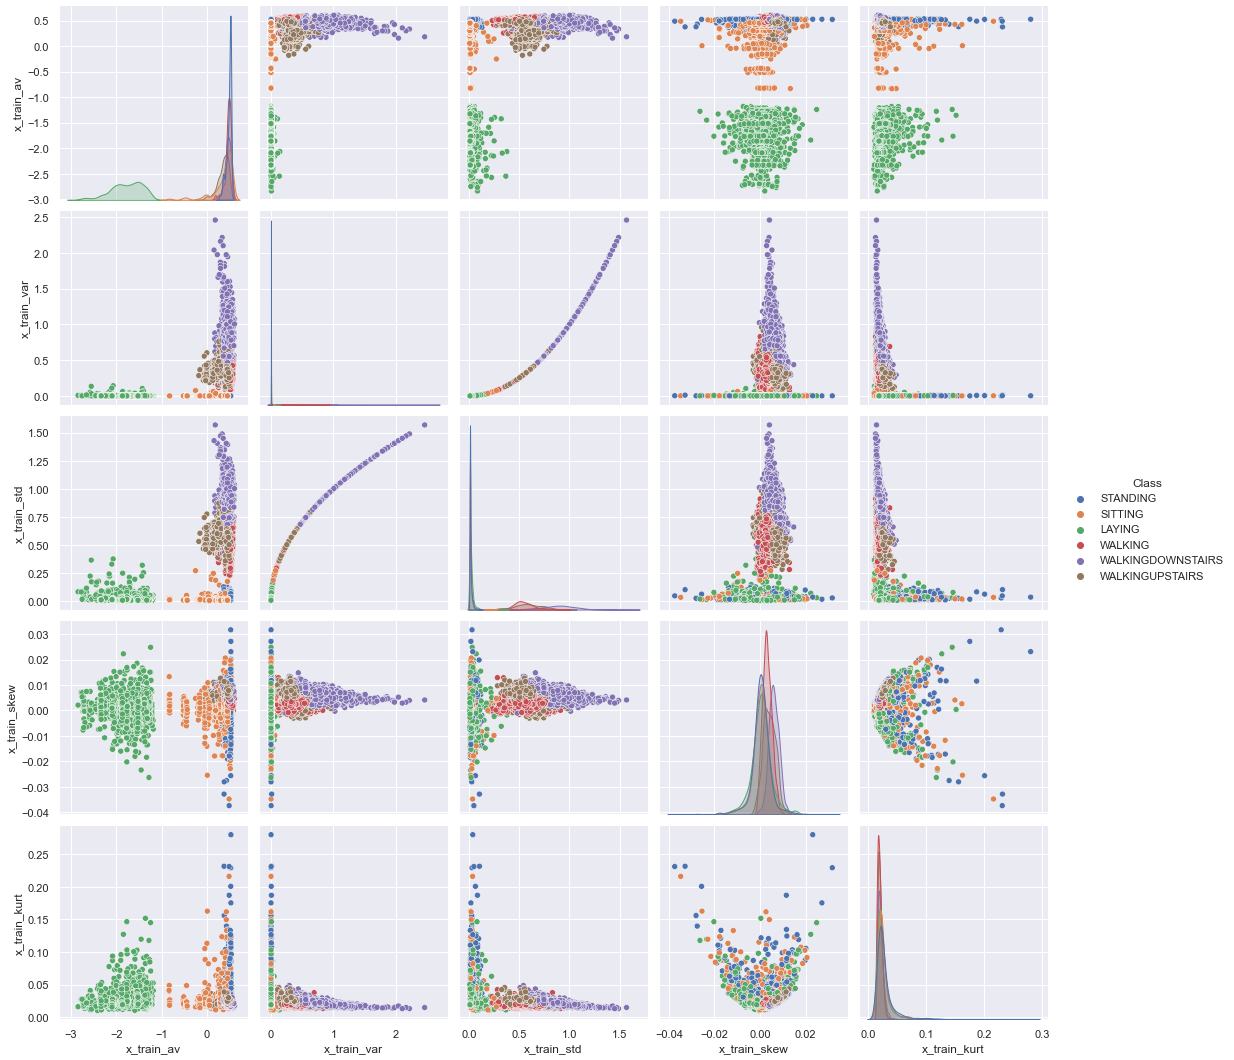

In [882]:
import seaborn as sns
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(x_train1, hue='Class', height=3);

# fft_x_train_av	fft_x_train_var	fft_x_train_std	fft_x_train_skew	fft_x_train_kurt	

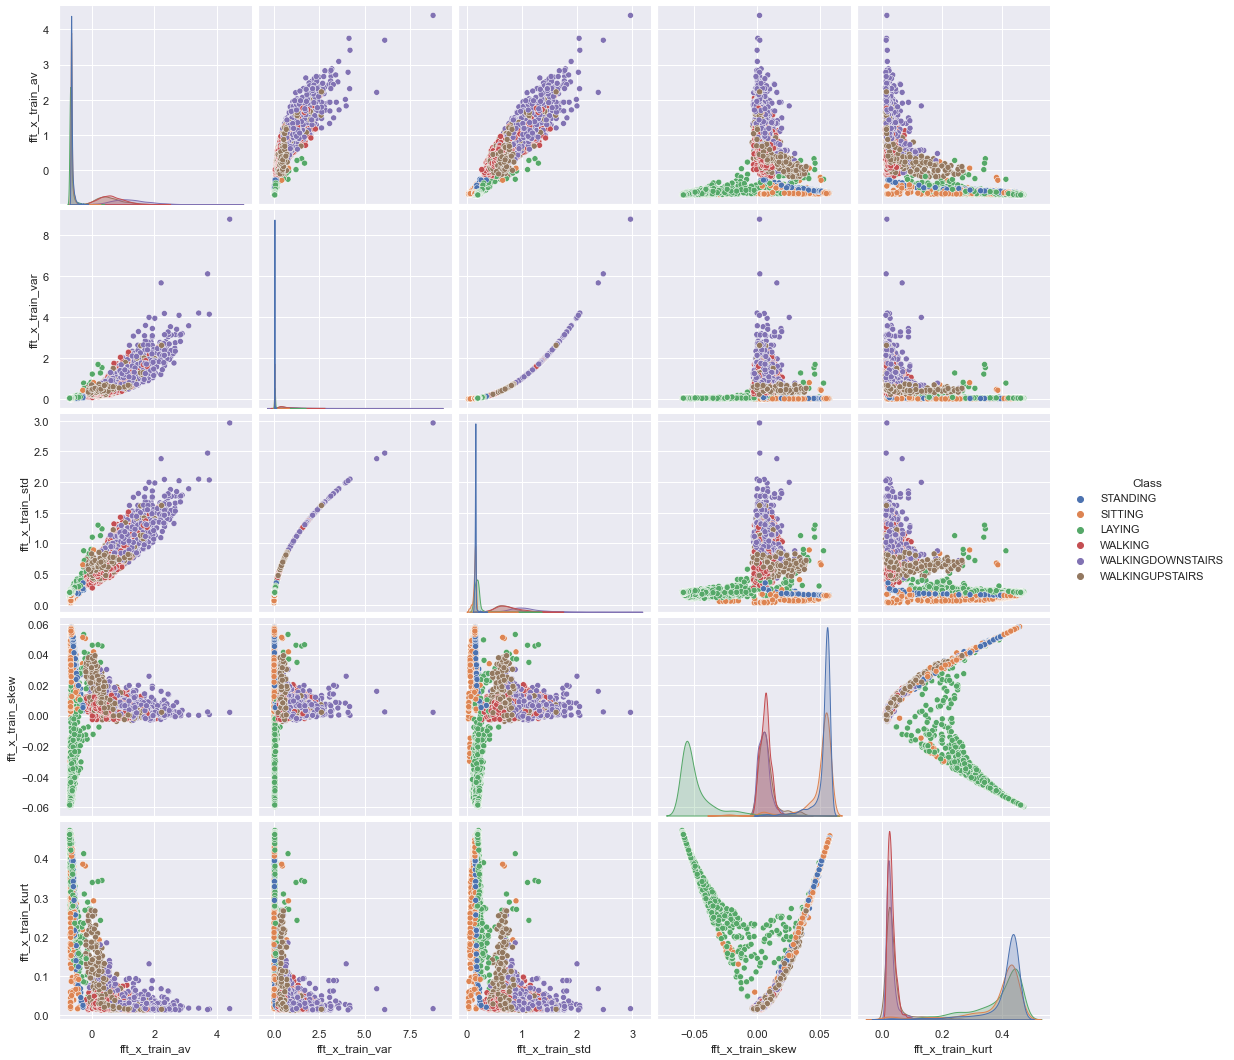

In [873]:
import seaborn as sns
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(x_train2, hue='Class', height=3);



# x_train_em	x_train_sma	x_train_min	x_train_max	x_train_mad

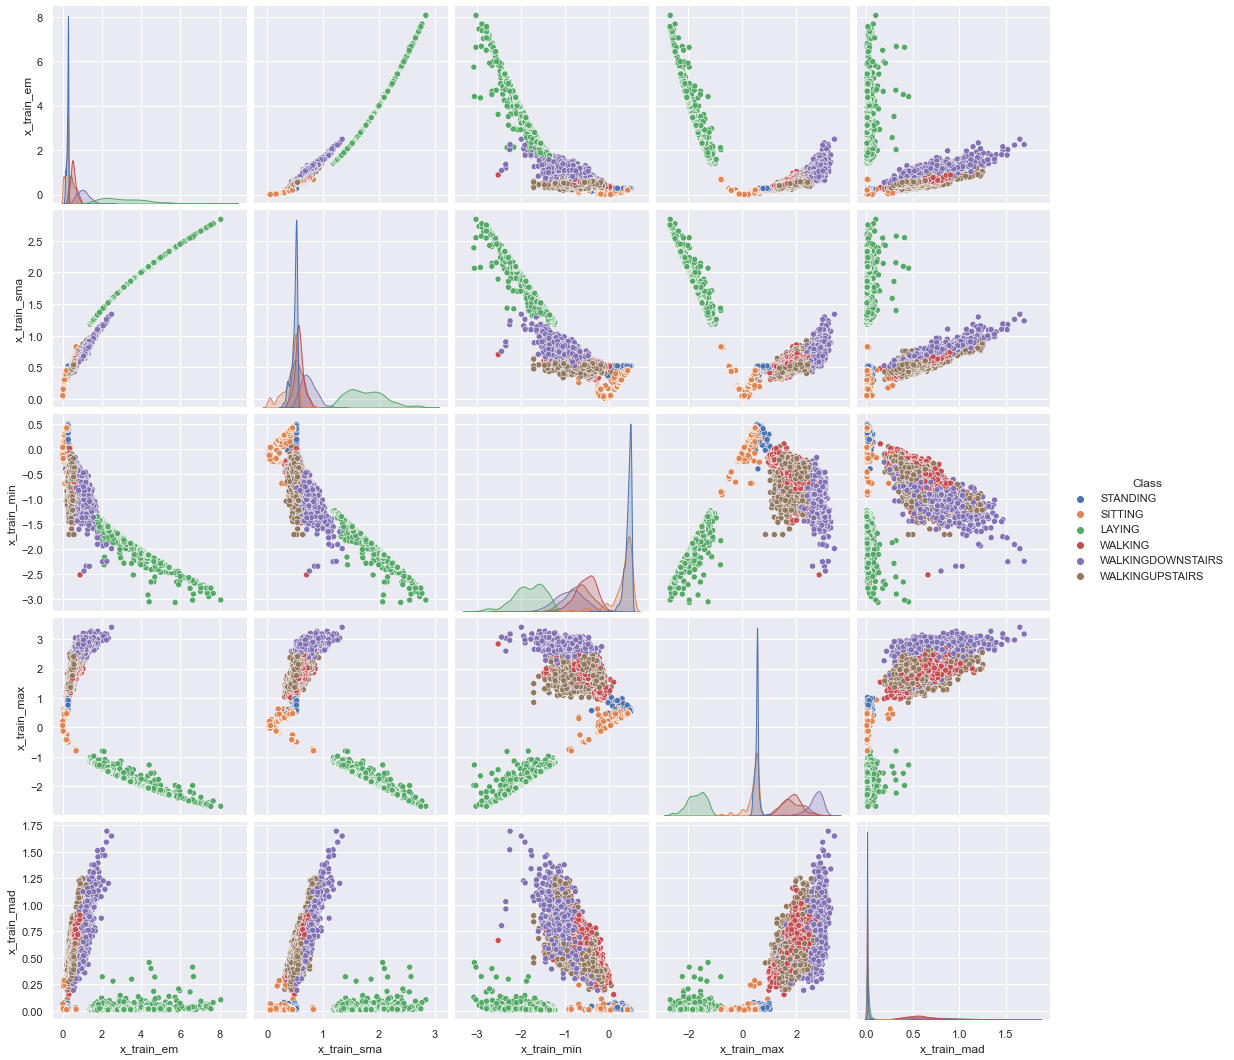

In [901]:
import seaborn as sns
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(x_train3, hue='Class', height=3);

# fft_x_train_em	fft_x_train_sma	fft_x_train_min	fft_x_train_max	fft_x_train_mad

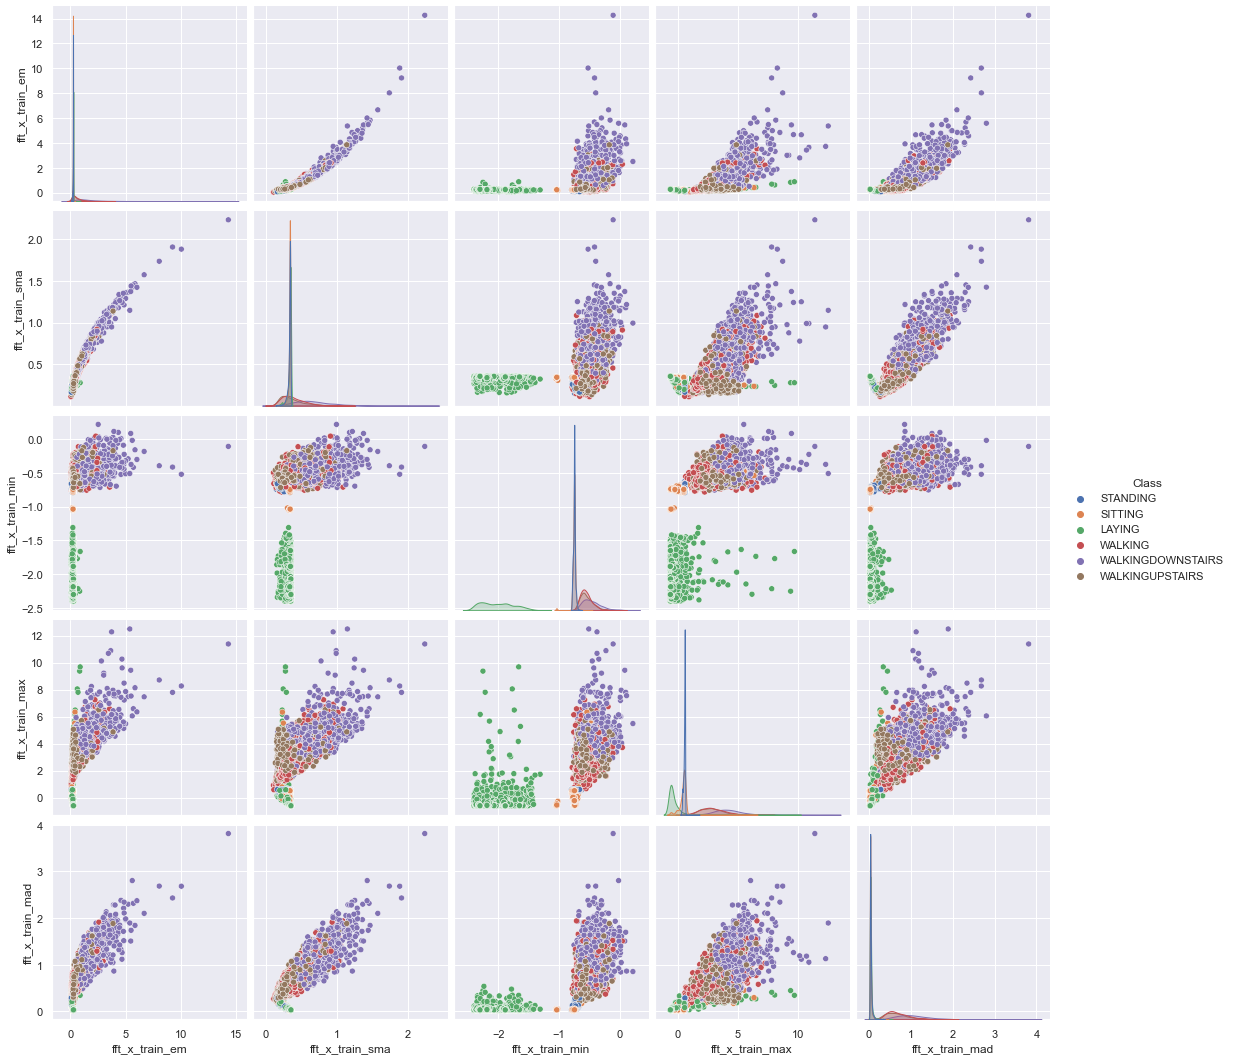

In [902]:
import seaborn as sns
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(x_train4, hue='Class', height=3);

# x_train_av	x_train_min	x_train_max	fft_x_train_kurt	fft_x_train_skew	fft_x_train_mad

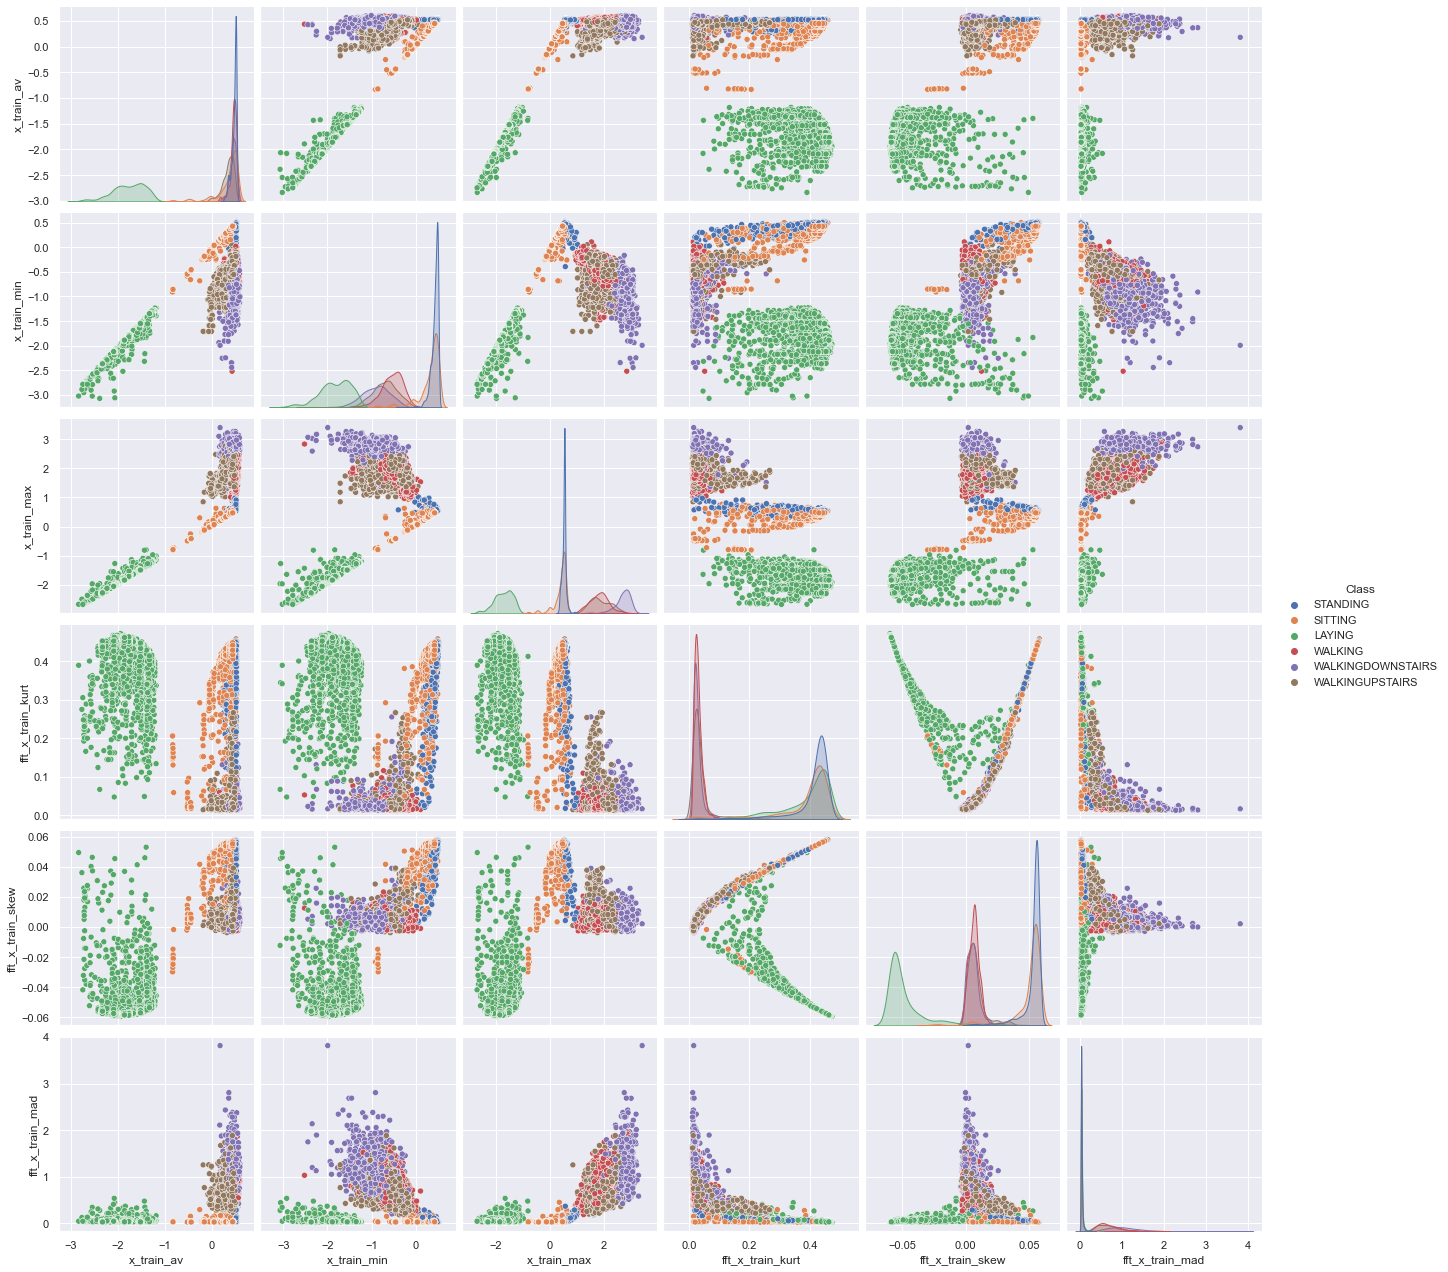

In [915]:
import seaborn as sns
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(x_train5, hue='Class', height=3);

In [916]:
x_train1 = x_train1.drop(columns=['Class'])
x_train2 = x_train2.drop(columns=['Class'])
x_train3 = x_train3.drop(columns=['Class'])
x_train4 = x_train4.drop(columns=['Class'])
x_train5 = x_train5.drop(columns=['Class'])

## Run min_max_Scaler on features


In [692]:
'''
#x_train=x_train_fft
#x_test=x_test_fft
(x_train,x_test)=min_max_Scaler(x_train,x_test)
print(x_train.shape)
'''

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7352, 128)


## Run standard_scaler on features

In [855]:
'''
#x_train=x_train_fft
#x_test=x_test_fft
(x_train,x_test)=standard_scaler(x_train,x_test)
print(x_train.shape)
'''

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7352, 20)


# Knn model feature tests


## Select features according to a percentile of the highest scores.

In [863]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.feature_selection import SelectPercentile, chi2

x_train_new = SelectPercentile(chi2, percentile=40).fit_transform(abs(x_train), y_train)
x_test_new = SelectPercentile(chi2, percentile=40).fit_transform(abs(x_test), y_test)
#x_train_new = SelectKBest(chi2, k=8).fit_transform(abs(x_train), y_train)
#x_test_new=SelectKBest(chi2, k=8).fit_transform(abs(x_test), y_test)
print(x_train_new.shape)
print(x_test_new.shape)

(7352, 8)
(2947, 8)


# tested with square fft feature with min_max scaler


<ipython-input-816-c4a58bfd1dd8>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-816-c4a58bfd1dd8>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-816-c4a58bfd1dd8>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-816-c4a58bfd1dd8>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-816-c4a58bfd1dd8>:10: DataConversionWarning: A column-vector y was passed when a 1d array was

0.7797760434340006


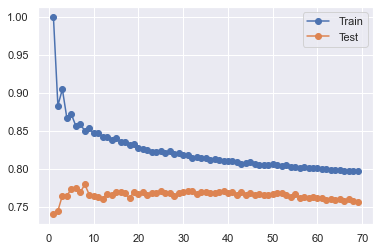

In [816]:

def knn(x_train,y_train,y_test,x_test):
    from sklearn.metrics import accuracy_score
    x_test_accuracy=[]
    x_train_accuracy=[]
    values = [i for i in range(1, 70)]
    for i in values:
        #Apply KNN
        model = KNeighborsClassifier(n_neighbors=i)
        #Fit model 
        model.fit(x_train, y_train)
        #Evaluate x_test and fill x_test_accuracy array with accuracy scores
        y_pred_test = model.predict(x_test)
        y_pred_test = y_pred_test.reshape(2947,1)
        x_test_accuracy.append(accuracy_score(y_test, y_pred_test))
        #Evaluate x_train and fill x_train_accuracy array with accuracy scores
        y_pred_train = model.predict(x_train)
        y_pred_train = y_pred_train.reshape(7352,1)
        x_train_accuracy.append(accuracy_score(y_train, y_pred_train))
        
    max_accuracy_x_test=max(x_test_accuracy)
    max_accuracy_x_train=max(x_train_accuracy)
    return(max_accuracy_x_test,max_accuracy_x_train,x_test_accuracy,x_train_accuracy,values)
    
max_acc_test,max_acc_train,test_acc,train_acc,values=knn(x_train_fft,y_train,y_test,x_test_fft)

print(max_acc_test)
plt.plot(values, train_acc, '-o', label='Train')
plt.plot(values, test_acc, '-o', label='Test')
plt.legend()
plt.show()




# percentile 10, chi2

<ipython-input-862-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-862-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-862-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-862-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-862-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was

0.6314896504920258


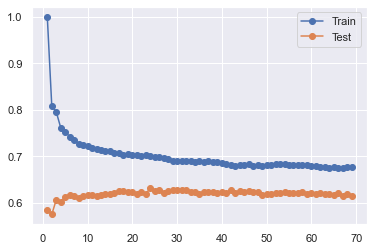

In [862]:
def knn(x_train,y_train,y_test,x_test):
    from sklearn.metrics import accuracy_score
    x_test_accuracy=[]
    x_train_accuracy=[]
    values = [i for i in range(1, 70)]
    for i in values:
        #Apply KNN
        model = KNeighborsClassifier(n_neighbors=i)
        #Fit model 
        model.fit(x_train, y_train)
        #Evaluate x_test and fill x_test_accuracy array with accuracy scores
        y_pred_test = model.predict(x_test)
        y_pred_test = y_pred_test.reshape(2947,1)
        x_test_accuracy.append(accuracy_score(y_test, y_pred_test))
        #Evaluate x_train and fill x_train_accuracy array with accuracy scores
        y_pred_train = model.predict(x_train)
        y_pred_train = y_pred_train.reshape(7352,1)
        x_train_accuracy.append(accuracy_score(y_train, y_pred_train))
        
    max_accuracy_x_test=max(x_test_accuracy)
    max_accuracy_x_train=max(x_train_accuracy)
    return(max_accuracy_x_test,max_accuracy_x_train,x_test_accuracy,x_train_accuracy,values)
    
max_acc_test,max_acc_train,test_acc,train_acc,values=knn(x_train_new,y_train,y_test,x_test_new)

print(max_acc_test)
plt.plot(values, train_acc, '-o', label='Train')
plt.plot(values, test_acc, '-o', label='Test')
plt.legend()
plt.show()

# percentile 40, chi2

<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was

0.7088564642008822


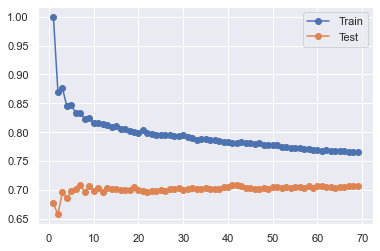

In [864]:
def knn(x_train,y_train,y_test,x_test):
    from sklearn.metrics import accuracy_score
    x_test_accuracy=[]
    x_train_accuracy=[]
    values = [i for i in range(1, 70)]
    for i in values:
        #Apply KNN
        model = KNeighborsClassifier(n_neighbors=i)
        #Fit model 
        model.fit(x_train, y_train)
        #Evaluate x_test and fill x_test_accuracy array with accuracy scores
        y_pred_test = model.predict(x_test)
        y_pred_test = y_pred_test.reshape(2947,1)
        x_test_accuracy.append(accuracy_score(y_test, y_pred_test))
        #Evaluate x_train and fill x_train_accuracy array with accuracy scores
        y_pred_train = model.predict(x_train)
        y_pred_train = y_pred_train.reshape(7352,1)
        x_train_accuracy.append(accuracy_score(y_train, y_pred_train))
        
    max_accuracy_x_test=max(x_test_accuracy)
    max_accuracy_x_train=max(x_train_accuracy)
    return(max_accuracy_x_test,max_accuracy_x_train,x_test_accuracy,x_train_accuracy,values)
    
max_acc_test,max_acc_train,test_acc,train_acc,values=knn(x_train_new,y_train,y_test,x_test_new)

print(max_acc_test)
plt.plot(values, train_acc, '-o', label='Train')
plt.plot(values, test_acc, '-o', label='Test')
plt.legend()
plt.show()

# mad - Max

In [904]:
x_train_mad_max=pd.DataFrame(np.concatenate((x_train_mad,x_train_max),axis=1))
x_test_mad_max=pd.DataFrame(np.concatenate((x_test_mad,x_test_max),axis=1))
print(x_train_mad_max.shape)
print(x_test_mad_max.shape)

(7352, 2)
(2947, 2)


<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was

0.6823888700373261


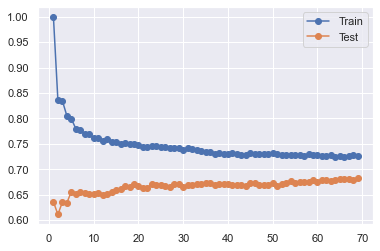

In [905]:
max_acc_test,max_acc_train,test_acc,train_acc,values=knn(x_train_mad_max,y_train,y_test,x_test_mad_max)

print(max_acc_test)
plt.plot(values, train_acc, '-o', label='Train')
plt.plot(values, test_acc, '-o', label='Test')
plt.legend()
plt.show()

# min - Max

In [906]:
x_train_min_max=pd.DataFrame(np.concatenate((x_train_min,x_train_max),axis=1))
x_test_min_max=pd.DataFrame(np.concatenate((x_test_min,x_test_max),axis=1))
print(x_train_min_max.shape)
print(x_test_min_max.shape)

(7352, 2)
(2947, 2)


<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was

0.6762809636918901


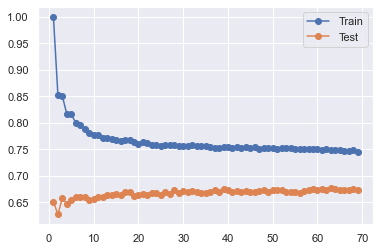

In [907]:
max_acc_test,max_acc_train,test_acc,train_acc,values=knn(x_train_min_max,y_train,y_test,x_test_min_max)

print(max_acc_test)
plt.plot(values, train_acc, '-o', label='Train')
plt.plot(values, test_acc, '-o', label='Test')
plt.legend()
plt.show()

# max-fft_skewness-mad-min-fft_kurt

In [917]:
x_train_max_fft_skewness_mad_min_fft_kurt=pd.DataFrame(np.concatenate((x_train_max,fft_x_train_skew,x_train_mad,x_train_min,fft_x_train_kurt),axis=1))
x_test_max_fft_skewness_mad_min_fft_kurt=pd.DataFrame(np.concatenate((x_test_max,fft_x_test_skew,x_test_mad,x_test_min,fft_x_test_kurt),axis=1))
print(x_train_max_fft_skewness_mad_min_fft_kurt.shape)
print(x_test_max_fft_skewness_mad_min_fft_kurt.shape)

(7352, 5)
(2947, 5)


<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-864-f788fa08ea6f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was

0.6915507295554801


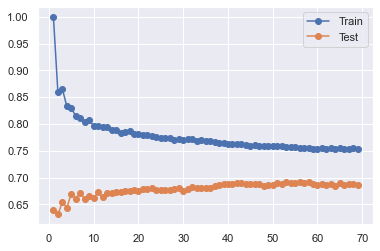

In [918]:
max_acc_test,max_acc_train,test_acc,train_acc,values=knn(x_train_max_fft_skewness_mad_min_fft_kurt,y_train,y_test,x_test_max_fft_skewness_mad_min_fft_kurt)

print(max_acc_test)
plt.plot(values, train_acc, '-o', label='Train')
plt.plot(values, test_acc, '-o', label='Test')
plt.legend()
plt.show()